<a href="https://colab.research.google.com/github/garypapa/ML/blob/main/Exercise_2_Papadopoulou_Garyfallia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Question 1

In [4]:
df = pd.read_csv('water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [5]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [6]:
column_names = df.columns.tolist()

ph


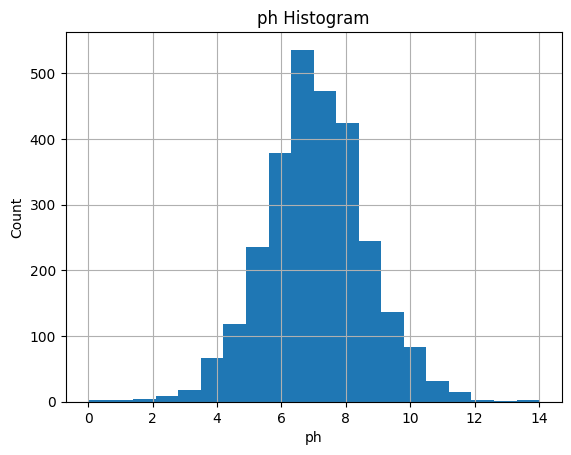

Hardness


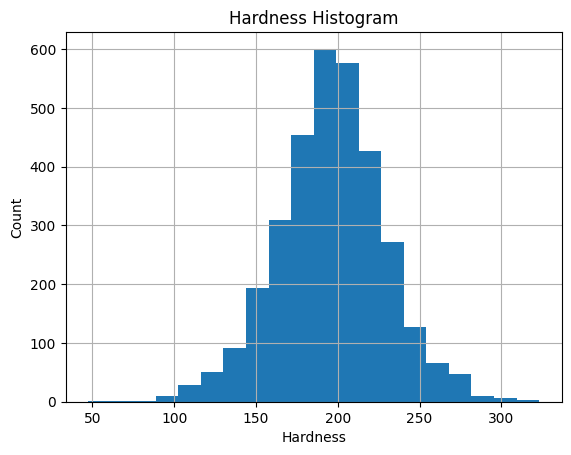

Solids


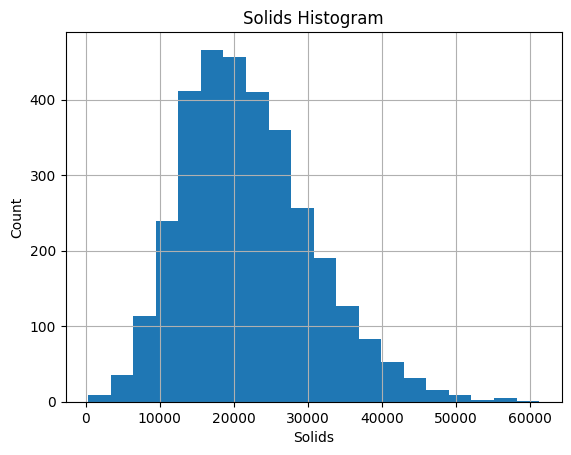

Chloramines


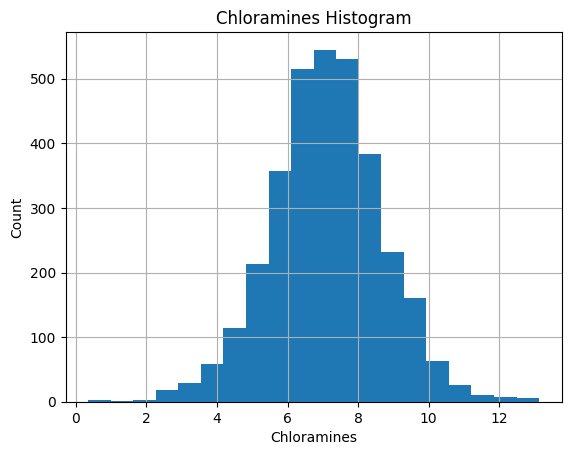

Sulfate


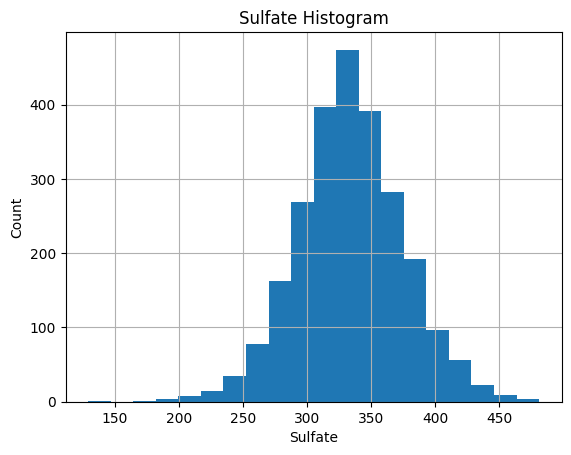

Conductivity


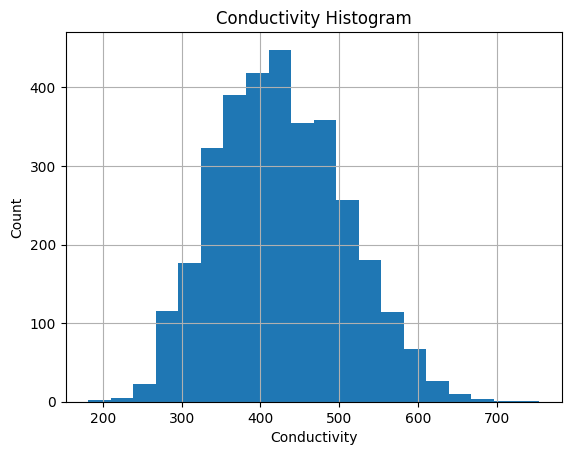

Organic_carbon


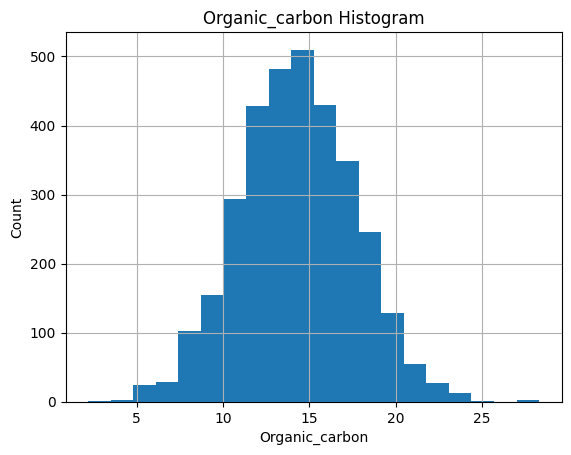

Trihalomethanes


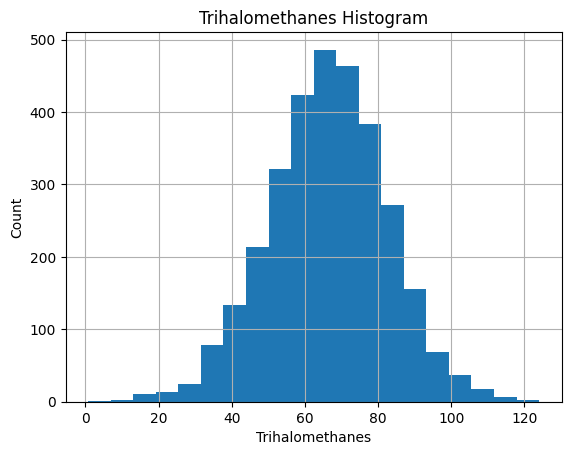

Turbidity


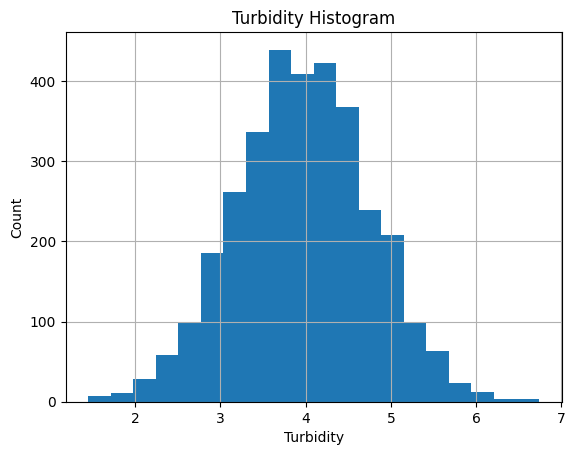

Potability


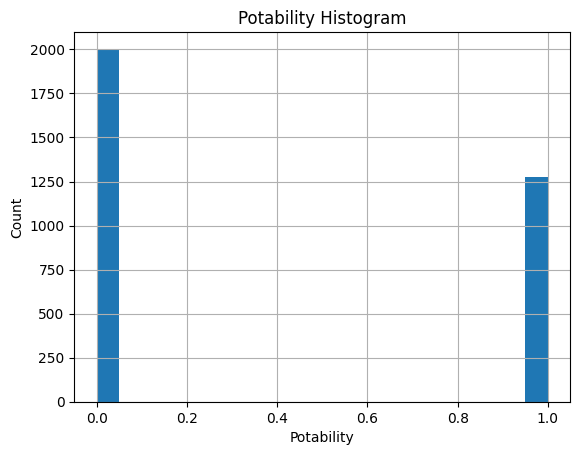

In [7]:
for column in column_names:
    print(column)
    df[column].hist(bins=20)
    plt.title(f'{column} Histogram')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()


<Axes: >

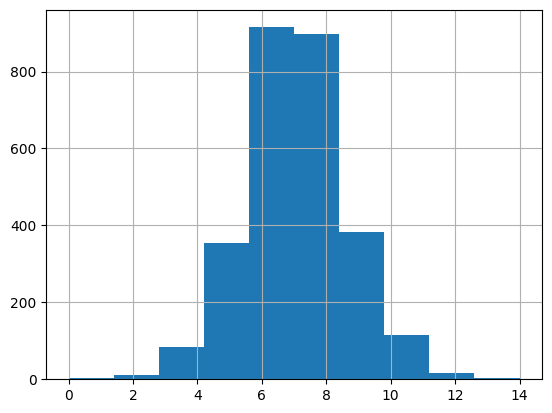

In [ ]:
df['ph'].hist()

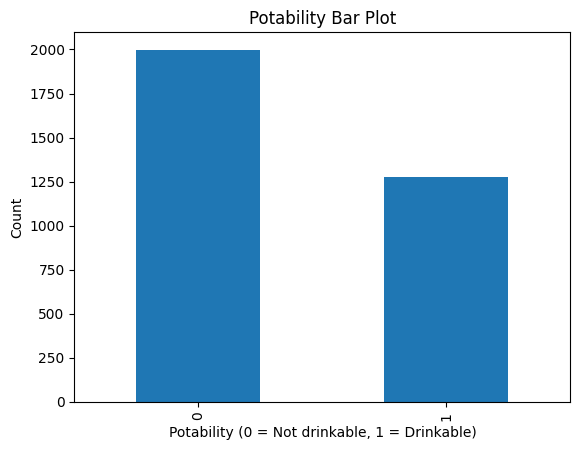

In [8]:
df['Potability'].value_counts().plot(kind='bar')
plt.title('Potability Bar Plot')
plt.xlabel('Potability (0 = Not drinkable, 1 = Drinkable)')
plt.ylabel('Count')
plt.show()


In [9]:
df.isna().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [10]:
df['Potability'].value_counts()

,count
Potability,
0,1998
1,1278


In [11]:
len(df)

3276

The NaN values are:


*   ph 491
*   Sulfate 781
*   Thrihalomethanes 162

So, the in the 3276 values the 1434 (491+781+165) are NaN, the 43,77% are NaN.
The dataset is not good.
Also, the for non drinkable we have 60,99 % and for drinkable we have 39,01 %.


# Question 2

In [12]:

ph_low_potable = len(df[(df['Potability'] == 1) & (df['ph'] < 6.5)])
ph_low_non_potable = len(df[(df['Potability'] == 0) & (df['ph'] < 6.5)])
ph_low_total = len(df[df['ph'] < 6.5])

ph_mid_potable = len(df[(df['Potability'] == 1) & (df['ph'].between(6.5, 8.5))])
ph_mid_non_potable = len(df[(df['Potability'] == 0) & (df['ph'].between(6.5, 8.5))])
ph_mid_total = len(df[df['ph'].between(6.5, 8.5)])

ph_high_potable = len(df[(df['Potability'] == 1) & (df['ph'] > 8.5)])
ph_high_non_potable = len(df[(df['Potability'] == 0) & (df['ph'] > 8.5)])
ph_high_total = len(df[df['ph'] > 8.5])

print("pH < 6.5:")
print(f"  Potable: {round((ph_low_potable / ph_low_total) * 100, 2)}%")
print(f"  Non-Potable: {round((ph_low_non_potable / ph_low_total) * 100, 2)}%")

print("\n6.5 ≤ pH ≤ 8.5:")
print(f"  Potable: {round((ph_mid_potable / ph_mid_total) * 100, 2)}%")
print(f"  Non-Potable: {round((ph_mid_non_potable / ph_mid_total) * 100, 2)}%")

print("\npH > 8.5:")
print(f"  Potable: {round((ph_high_potable / ph_high_total) * 100, 2)}%")
print(f"  Non-Potable: {round((ph_high_non_potable / ph_high_total) * 100, 2)}%")



pH < 6.5:
  Potable: 36.78%
  Non-Potable: 63.22%

6.5 ≤ pH ≤ 8.5:
  Potable: 43.9%
  Non-Potable: 56.1%

pH > 8.5:
  Potable: 33.13%
  Non-Potable: 66.87%


Water with pH between 6.5 and 8.5 has the highest percentage of potable samples (43.9%),
while water outside this range is less likely to be potable.

# Question 3

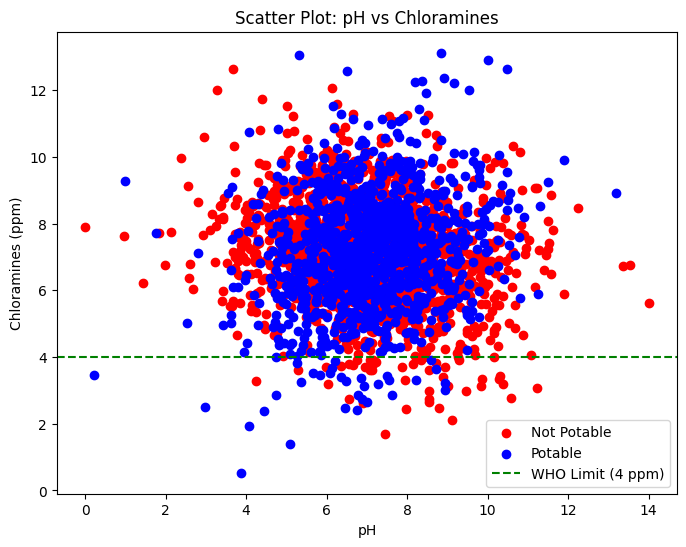

In [ ]:
plt.figure(figsize=(8,6))

plt.scatter(df[df['Potability'] == 0]['ph'],
            df[df['Potability'] == 0]['Chloramines'],
            color='red', label='Not Potable')

plt.scatter(df[df['Potability'] == 1]['ph'],
            df[df['Potability'] == 1]['Chloramines'],
            color='blue', label='Potable')

plt.axhline(y=4, color='green', linestyle='--', label='WHO Limit (4 ppm)')

plt.title('Scatter Plot: pH vs Chloramines')
plt.xlabel('pH')
plt.ylabel('Chloramines (ppm)')
plt.legend()
plt.show()


Most points are above 4 ppm of Chloramine, meaning the water is not potable.

# Question 4

In [ ]:
df = df.fillna(df.mean())

In [ ]:
df.isna().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


# Question 5

In [ ]:
x = df.drop(columns=['Potability']).to_numpy()
y = df['Potability'].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

x_train.shape, y_train.shape, x_test.shape, y_test.shape


((2293, 9), (2293,), (983, 9), (983,))

# Question 6

In [ ]:
model = DecisionTreeClassifier(random_state=0)
model.fit(x_train, y_train)

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
# Calculate accuracy for both sets
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Training accuracy: {round(train_acc*100, 2)}%")
print(f"Test accuracy: {round(test_acc*100, 2)}%")


Training accuracy: 100.0%
Test accuracy: 57.48%


# Question 7

In [ ]:
criteria = ['gini', 'entropy']
max_depths = [None, 3, 5]
min_splits = [2, 5]
min_leafs = [1, 2]
max_features = [None, 'sqrt']
ccp_alphas = [0, 0.01]

results = []

for crit in criteria:
    for depth in max_depths:
        for split in min_splits:
            for leaf in min_leafs:
                for feat in max_features:
                    for alpha in ccp_alphas:
                        model = DecisionTreeClassifier(
                            criterion=crit,
                            max_depth=depth,
                            min_samples_split=split,
                            min_samples_leaf=leaf,
                            max_features=feat,
                            ccp_alpha=alpha,
                            random_state=0
                        )
                        model.fit(x_train, y_train)

                        train_acc = accuracy_score(y_train, model.predict(x_train))
                        test_acc = accuracy_score(y_test, model.predict(x_test))

                        results.append([crit, depth, split, leaf, feat, alpha,
                                        round(train_acc*100, 2), round(test_acc*100, 2)])

results_df = pd.DataFrame(results, columns=[
    'criterion', 'max_depth', 'min_samples_split', 'min_samples_leaf',
    'max_features', 'ccp_alpha', 'train_acc', 'test_acc'
])

results_df


,criterion,max_depth,min_samples_split,min_samples_leaf,max_features,ccp_alpha,train_acc,test_acc
0,gini,NaN,2,1,None,0.00,100.00,57.48
1,gini,NaN,2,1,None,0.01,60.53,62.05
2,gini,NaN,2,1,sqrt,0.00,100.00,62.26
3,gini,NaN,2,1,sqrt,0.01,60.53,62.05
4,gini,NaN,2,2,None,0.00,95.16,58.19
...,...,...,...,...,...,...,...,...
91,entropy,5.0,5,1,sqrt,0.01,62.01,62.67
92,entropy,5.0,5,2,None,0.00,67.12,65.51
93,entropy,5.0,5,2,None,0.01,62.01,62.67
94,entropy,5.0,5,2,sqrt,0.00,64.28,62.05


# Question 8

In [ ]:
best = results_df[results_df['max_depth'] == 3].sort_values(by='test_acc', ascending=False).head(1)
best


,criterion,max_depth,min_samples_split,min_samples_leaf,max_features,ccp_alpha,train_acc,test_acc
72,entropy,3.0,5,1,None,0.0,64.11,63.99


In [ ]:
model_best = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=3,
    min_samples_split=5,
    min_samples_leaf=1,
    max_features=None,
    ccp_alpha=0.0,
    random_state=0
)

model_best.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=5,
                       random_state=0)

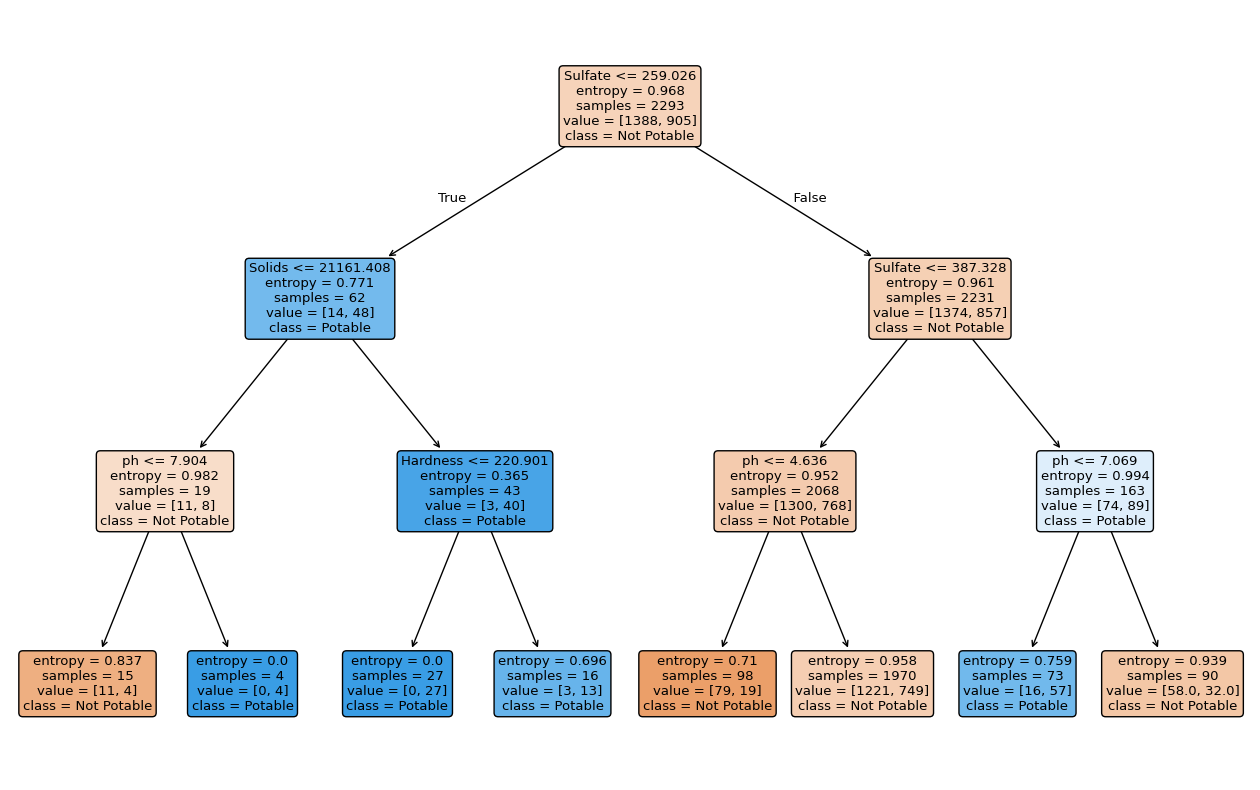

In [ ]:
plt.figure(figsize=(16,10))
tree.plot_tree(
    model_best,
    feature_names=df.drop(columns=['Potability']).columns,
    class_names=['Not Potable', 'Potable'],
    filled=True,
    rounded=True
)
plt.show()


The Decision Tree mainly uses Sulfate, Solids, Hardness, and pH to classify the samples.
Low Sulfate and balanced pH values usually indicate Potable water, while high Sulfate or extreme pH values point to Not Potable water.
Overall, these four chemical features are the key factors influencing water quality.

# Question 9

In [ ]:
best_overall = results_df.sort_values(by='test_acc', ascending=False).head(1)
best_overall


,criterion,max_depth,min_samples_split,min_samples_leaf,max_features,ccp_alpha,train_acc,test_acc
92,entropy,5.0,5,2,None,0.0,67.12,65.51


In [ ]:
model_best_overall = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features=None,
    ccp_alpha=0.0,
    random_state=0
)

model_best_overall.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       min_samples_split=5, random_state=0)

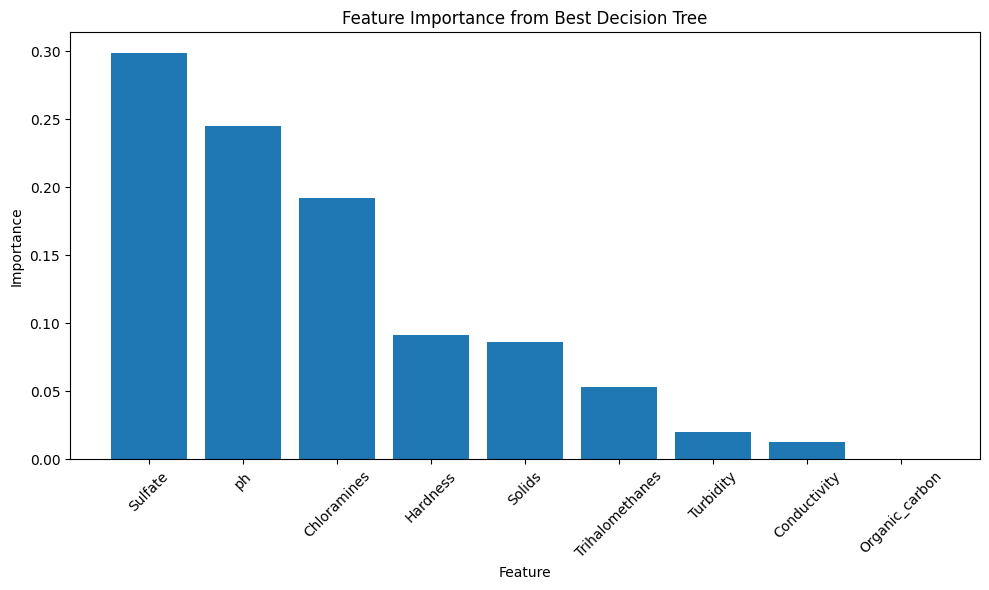

In [ ]:


feature_names = df.drop(columns=['Potability']).columns
importances = model_best_overall.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), feature_names[indices], rotation=45)
plt.title('Feature Importance from Best Decision Tree')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.tight_layout()
plt.show()


The most important features according to the Decision Tree are Sulfate, pH, Chloramines, Hardness, and Solids.
These have the highest influence on determining whether the water is potable or not.
Therefore, if the device can measure only five chemical properties, it should analyze these features,
as they provide the best information for classifying water quality accurately.

# Question 10

A Random Forest uses many Decision Trees trained on random subsets of data.
This reduces overfitting and makes predictions more stable and accurate than a single tree.

# Question 11

In [ ]:
criteria = ['gini', 'entropy']
max_depths = [None, 3, 5]
min_splits = [2, 5]
min_leafs = [1, 2]
max_features = [None, 'sqrt']
n_estimators_list = [50, 100, 200]

results_rf = []

for crit in criteria:
    for depth in max_depths:
        for split in min_splits:
            for leaf in min_leafs:
                for feat in max_features:
                    for n_est in n_estimators_list:
                        model_rf = RandomForestClassifier(
                            criterion=crit,
                            max_depth=depth,
                            min_samples_split=split,
                            min_samples_leaf=leaf,
                            max_features=feat,
                            n_estimators=n_est,
                            random_state=0
                        )
                        model_rf.fit(x_train, y_train)

                        y_train_pred_rf = model_rf.predict(x_train)
                        y_test_pred_rf = model_rf.predict(x_test)

                        train_acc = accuracy_score(y_train, y_train_pred_rf)
                        test_acc = accuracy_score(y_test, y_test_pred_rf)

                        results_rf.append([
                            crit, depth, split, leaf, feat, n_est,
                            round(train_acc*100, 2), round(test_acc*100, 2)
                        ])


columns = [
    'criterion', 'max_depth', 'min_samples_split', 'min_samples_leaf',
    'max_features', 'n_estimators', 'train_acc', 'test_acc'
]

results_rf_df = pd.DataFrame(results_rf, columns=columns)
results_rf_df


,criterion,max_depth,min_samples_split,min_samples_leaf,max_features,n_estimators,train_acc,test_acc
0,gini,NaN,2,1,None,50,100.00,67.24
1,gini,NaN,2,1,None,100,100.00,67.75
2,gini,NaN,2,1,None,200,100.00,68.57
3,gini,NaN,2,1,sqrt,50,100.00,69.38
4,gini,NaN,2,1,sqrt,100,100.00,69.79
...,...,...,...,...,...,...,...,...
139,entropy,5.0,5,2,None,100,69.78,66.53
140,entropy,5.0,5,2,None,200,69.52,66.02
141,entropy,5.0,5,2,sqrt,50,68.60,65.41
142,entropy,5.0,5,2,sqrt,100,68.12,65.21


# Question 12

It is more important for the model to correctly predict non-potable water.
Misclassifying unsafe water as potable could be dangerous for people’s health,
while the opposite error only causes inconvenience.

# Question 13

In health-related applications, explainability is often as important as accuracy.
While a Random Forest may perform better statistically, a Decision Tree could be legally safer because it is transparent and easier to justify in case of an audit or legal dispute.
The best approach would be to use the Random Forest for internal predictions and the Decision Tree for explainable reporting.